In [3]:
%matplotlib inline
import numpy as np;
import matplotlib
import matplotlib.pyplot as plt

$\LaTeX \text{ commands here}
\newcommand{\R}{\mathbb{R}}
\newcommand{\im}{\text{im}\,}
\newcommand{\norm}[1]{||#1||}
\newcommand{\inner}[1]{\langle #1 \rangle}
\newcommand{\span}{\mathrm{span}}
\newcommand{\proj}{\mathrm{proj}}
\newcommand{\OPT}{\mathrm{OPT}}
\newcommand{\grad}{\nabla}
\newcommand{\eps}{\varepsilon}
$

<hr style="border: 5px solid black">

**Georgia Tech, CS 4540**

# L14: Solving Linear Systems

*Thursday, October 4, 2018*

### Linear Systems

Given $A \in \R^{m \times n}$ and $b \in \R^{m}$, want to compute $x \in \R^{n}$ such that $Ax = b$.

* There are $m$ linear equations and $n$ unknowns
* If $m > n$, the system is *overdetermined*
* If $m < n$, the system is *underdetermined*
* If $m = n$ and $A$ is invertible, we want $x = A^{-1} b$

For now, we will focus on **square matrices** $A \in \R^{m \times m}$, which we also assume to be invertible.

### Numerical Methods

You already know of a few algorithms for solving linear systems...

* **Gradient Descent** on the quadratic $f(x) = \frac{1}{2} x^T A x - b^T x$
    $$
    x_{t+1} = x_t - \eta (\nabla_{x_t} f) = x_t - \eta (A x_t - b)
    $$
* **Gaussian Elimination** from your intro linear algebra class
    * elementary row operations, reduced row-echelon form...
    * this method is *numerically unstable* without additional modifications
    * see Trefethen & Bau, *Numerical Linear Algebra* §20-21

### Problem:  Simple Linear Systems

<div style="padding:10px;margin:10px;border:1px solid black">
<b>Part A:</b> Solve the diagonal linear system below.  How many operations are required?  Assume all diagonal entries are nonzero.
    $$
    \begin{bmatrix} 
    a_{11} &  &        &                 \\
            & a_{22}   &        &        \\
            &        & \ddots &          \\
            &        &        & a_{mm}
    \end{bmatrix}
    \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_m \end{bmatrix}
    =
    \begin{bmatrix} b_1 \\ b_2 \\ \vdots \\ b_m \end{bmatrix}
    $$
</div>
<div style="padding:10px;margin:10px;border:1px solid black">
<b>Part B:</b> Solve the upper-triangular linear system below.  How many operations are required?  Assume all diagonal entries are nonzero.
    $$
    \begin{bmatrix} 
    a_{11}  & a_{12} & \cdots & a_{1m} \\
            & a_{22} & \cdots & a_{2m} \\
            &        & \ddots & \vdots       \\
            &        &        & a_{mm}
    \end{bmatrix}
    \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_m \end{bmatrix}
    =
    \begin{bmatrix} b_1 \\ b_2 \\ \vdots \\ b_m \end{bmatrix}
    $$
</div>

### Solution

**Part A:** Set $x_k = \frac{b_k}{a_{kk}}$.  Requires $O(m)$ operations.

**Part B:** Use "back substitution", requiring $O(m^2)$ operations.  Starting with $x_m = b_m / a_{mm}$, the next equation from the bottom gives
    $$
    a_{m-1,m-1} x_{m-1} + a_{m-1,m} x_m = b_{m-1} \\
    \implies
    x_{m-1} = (b_{m-1} - a_{m-1,m} x_m) / a_{m-1,m-1}
    $$
Continuing in this fashion, we find
    $$
    x_j = \frac{1}{a_{jj}} \left( b_j - \sum_{k=j+1}^m x_k a_{jk} \right)
    $$

### Stationary Iterative Methods

The idea is to approximate $A^{-1}$ by splitting $A = M - N$ into two parts,
* $M \in \R^{m \times m}$ which is nonsingular and computationally cheap to invert
* $N \in \R^{m \times m}$ which is harder to work with

For example, splitting $A = D + L + U$ into the diagonal, strictly-upper-triangular, and strictly-lower-triangular parts respectively,

* **Jacobi:**  Choose $M = D$ and $N = -(U+L)$
* **Gauss-Seidel:** Choose $M = D+L$ and $N = -U$
* **Damped Jacobi:** Choose $M = \frac{1}{\omega} D$ for some $\omega > 0$

### Stationary Iterative Methods

Let $x^* \in \R^m$ be the exact solution to $A x^* = b$.  Then
    $$
    \begin{align}
    Ax^* = (M-N)x^* &= b \\
    Mx^* &= Nx^* + b \\
     x^* &= M^{-1}(Nx^* + b)
    \end{align}
    $$
    
Therefore, $x^*$ is a fixed point of $\Phi(x) = M^{-1}(Nx + b)$.  We'll try to use **fixed point iteration** to approximate $x^*$:

$$
x_{n+1} = \Phi(x_n) = M^{-1}(Nx + b)
$$

### Problem:  Spectral Radius

Want to solve: $Ax = b$. Fixed point iteration: split $A = M - N$, where $M$ is easy-to-invert, $N$ is aribtrary. The **fixed point iteration** tries to find approximate $x^*$ via update:
$$
x_{t+1} = \Phi(x_t) = M^{-1}(Nx_t + b)
$$

Recall that the *spectral radius* of a matrix $M$ is $\rho(M) := \max\{|\lambda_1(M)|, \ldots, |\lambda_n(M)|\}$.

**(Part A)**: Show that if $\rho(M^{-1} N) > 1$, then the fixed point scheme above diverges for some initial $x_0$. 

*Hint*: assume that $b = 0$, and consider the largest eigenvector of $M^{-1}N$.


#### Solution

Let $x_0 = v$ be an eigenvector for $M^{-1}N$ whose eigenvalue $\lambda$'s absolute value is larger than 1. If we assume that $b = 0$, then fixed point iteration is going to generate the point $x_t = (M^{-1}N)^t x_0 = \lambda^t x_0$. The former clearly diverges!

### Problem: Spectral Radius

Want to solve: $Ax = b$. Fixed point iteration: split $A = M - N$, where $M$ is easy-to-invert, $N$ is aribtrary. The **fixed point iteration** tries to find approximate $x^*$ via update:
$$
x_{t+1} = \Phi(x_t) = M^{-1}(Nx_t + b)
$$

Recall that the *spectral radius* of a matrix $M$ is $\rho(M) := \max\{|\lambda_1(M)|, \ldots, |\lambda_n(M)|\}$.

**(Part B)**: Show that if $\rho(M^{-1} N) < 1$, the fixed point scheme above converges to the solution $x$ for any initial $x_0$.

*Hint*: Let's say $x^*$ satisfies the linear system, $Ax^* = b$. You want to look at how the error terms $\text{err}_t := x_t - x^*$ evolve after each iteration. Can you show $\|\text{err}_t\|$ is shrinking from round to round?

#### Solution

If you consider the error term $\text{err}_t := x_t - x^*$, then it is easy to check that
$$\text{err}_{t+1} = (M^{-1}N) \text{err}_t$$
Now let us see what happens to the norm of $\|\text{err}_{t+1}\|$:
$$\|\text{err}_{t+1}\| = \|(M^{-1}N) \text{err}_t\| = \|\text{err}_t\| \|(M^{-1}N) \frac{\text{err}_t}{\|\text{err}_t\|}\| \leq \|\text{err}_t\| \max_{\|z\| = 1} \|M^{-1}N z\|$$
However, $\max_{\|z\| = 1} \|M^{-1}N z\|$ is indeed the spectral radius $\rho(M^{-1}N)$, hence we have shown that
$$
\|\text{err}_{t+1}\| \leq \|\text{err}_t\| \rho(M^{-1}N),
$$
which implies that the error term is always shrinking at a geometric rate!

### Problem:  Diagonal Dominance

A matrix $A \in \R^{m \times m}$ is **strictly diagonally dominant** if within every row, the diagonal entry is larger in absolute value than than the sum of the absolute values of the other terms,

$$
|a_{ii}| > \sum_{j \neq i} |a_{ij}|
$$

<div style="padding:10px; margin:10px; style:1px solid black">
<b>Problem:</b> Prove that Jacobi's method converges for any strictly diagonally dominant matrix.
</div>

> *Hint:* Use the Gershgorin Circle Theorem, which states that every eigenvalue of $A$ lies within at least one of the discs $D(a_{ii}, R_i) \subset \mathbb{C}$ of radius $R_i=\sum_{j\neq i} |a_{ij}|$ centered at $a_{ii}$ in the complex plane.

### Implementation:  Laplace Equation

Solve the system $Au = 0$ where $A$ has the form:

In [154]:
def poisson_matrix(n):
    # step size
    h = 1 / (n+1);
    # tridiagonal matrix
    result  = -2 * np.eye(n);
    result += np.diag(np.ones(n-1), -1);
    result += np.diag(np.ones(n-1), +1);
    return result / h**2;

In [155]:
poisson_matrix(5)

array([[-72.,  36.,   0.,   0.,   0.],
       [ 36., -72.,  36.,   0.,   0.],
       [  0.,  36., -72.,  36.,   0.],
       [  0.,   0.,  36., -72.,  36.],
       [  0.,   0.,   0.,  36., -72.]])

In [148]:
def jacobi(A, b, x0, max_iter=100):
    x = np.copy(x0);
    
    for k in range(max_iter):
        x = ## FILL IN
    
    return x;

SyntaxError: invalid syntax (<ipython-input-148-cb5cfbae3d6f>, line 5)

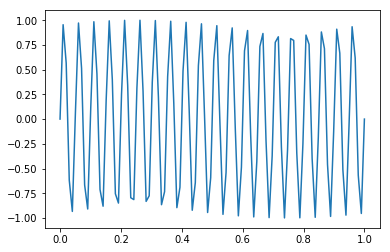

In [152]:
n = 100
A = poisson_matrix(n);

# sinusoidal error
k = 20;
x = np.linspace(0, 1, n);
u0 = np.sin(2*np.pi*x * k)
plt.plot(x,u0)

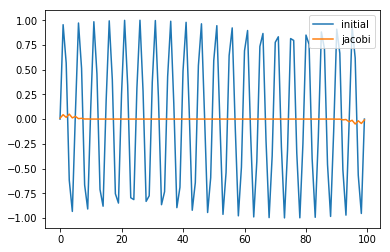

In [153]:
u_jacobi = jacobi(A, np.zeros(n), u0, max_iter=10)
plt.plot(np.arange(n), u0, label="initial")
plt.plot(np.arange(n), u_jacobi, label="jacobi")
plt.legend()